# Homework 2 

I've chosen `Alcohol Effects On Study` dataset from Kaggle competition. For this particular homework I've used only `Maths.csv` dataframe.
My prediction model of choice is XGBRegressor which is a tree-based ensemble regression model. 
Model's task is to predict final grade marked as "G3" based on other observations. Target values spans from 0 to 20.  

# (4)

I've found two samples that has different variables of highest importance. 
First one's is a prediction for a high "G3" sample. Model predicts the "G3" value as 17.8. The values of highest importance are "G2" = 19 and "G1" = 19.
It's no suprise that since subject had good grades in previous years, then now he's expected to perform good as well.

![alt text](good_shap.png "Title")

Second sample of choise is a prediction for an average student. Here model predicts its "G3" as 11. The values of highest importance are "absences" = 4 and "famrel" = 5. These values have positive shap values. Low number of days of absences (4) and excelent quality of family relation look like a good feature to predict improvement of grades on.

![alt text](4_alternative.png "Title")

# (5)

In this task I've chosen one sample of good grades presented as first example in task 4. The other sample is a sample of bad grades example where the student had bad grades at value of around 4. First student had high "G2" feature and second one had low value of the same feature. It should come to no suprise that shap values for these students are very different. Good student had positive shap value for "G2" feature and bad student had negative shap value for the same feature.

![alt text](good_shap.png "Title")

![alt text](bad_shap.png "Title")

# (6)

The exact shap values for the same samples explained by shap and dalex library differ a bit, but first few variables of highest importance are the same for both libraries. To calculate the exact values of shap values we need to go through every permutation of variables, but since it's time consuming we often are satisfied with some approximation. Since both algorithms picked the same values of highest importance it shows the stability of probabilistic approach. Person that would've explain this model would come to the same conclusion with any of these libraries.

## SHAP

![alt text](good_shap.png "Title")

![alt text](bad_shap.png "Title")

## DALEX

![alt text](dalex.png "Title")

# (7)

In task 4 I've shown the explanation for a sample of a student with average grades. The same sample explained on a LinearRegression model yields different shap values. As we can see absences aren't as important as in XGBoost example. Both models have some simmilar variables of highest importance, but for the most part taken features differs. Since linear regression models are much simpler machine learning models then it might not get the complex conclusions just like tree ensembling models, what is also seen on models performance in a field of accuracy.

## XGBRegressor
![alt text](4_alternative.png "Title")
## LinearRegression
![alt text](7_linear.png "Title")

# TASK B

I've been tasked with calculating Shap values for a following value function.

v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100

Let's see how A contributes to different coalitions.
v(A) - v() = 20 - 0 = 20
v(A,B) - v(B) = 60 - 20 = 40 
v(A,C) - v(C) = 70 - 60 = 10
v(A,B,C) - v(B,C) = 100 - 70 = 30

Permutations of ABC: ABC, ACB, CAB, CBA, BAC, BCA
Which translates to an equation:
S(A) = 1/6 * (20 + 20 + 10 + 30 + 40 + 30) = 150 / 6 = 25

In [2]:
# https://www.kaggle.com/datasets/08163f86754da93458b7dfb3e1c80258069edd817a00db655f3ccc3da37c87b5?resource=download

# Download Maths.csv dataset from this link and put it into notebook directory.

import dalex as dx
import xgboost as xgb
import shap 
import lime

import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
import platform
print(f'Python {platform.python_version()}')
{package.__name__: package.__version__ for package in [dx, xgb, shap, sklearn, pd, np]}

Python 3.10.6


{'dalex': '1.5.0',
 'xgboost': '1.6.2',
 'shap': '0.41.0',
 'sklearn': '1.1.2',
 'pandas': '1.5.1',
 'numpy': '1.23.2'}

# Load data

In [4]:
maths = pd.read_csv('Maths.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Select samples ids

In [6]:
sample_first = 47
sample_second = 128
sample_third = 28

SAMPLES_IDS = [sample_first, sample_second, sample_third]

# Prepare data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 21
CURRENT = "G3"
categorical_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", 
                       "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
X = maths.drop(columns=CURRENT)
X = pd.get_dummies(X, columns = categorical_columns, drop_first=True)
y = maths[CURRENT]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

In [8]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
name = type(model).__name__
print(f"Accuracy of {name} model:\nTrain set: {train_score}\nTest set: {test_score}")

Accuracy of XGBRegressor model:
Train set: 0.9999999302039252
Test set: 0.8999616768096649


# Lime

In [18]:
shap_explainer = shap.explainers.Tree(model, data=X)
shap_values = shap_explainer(X)


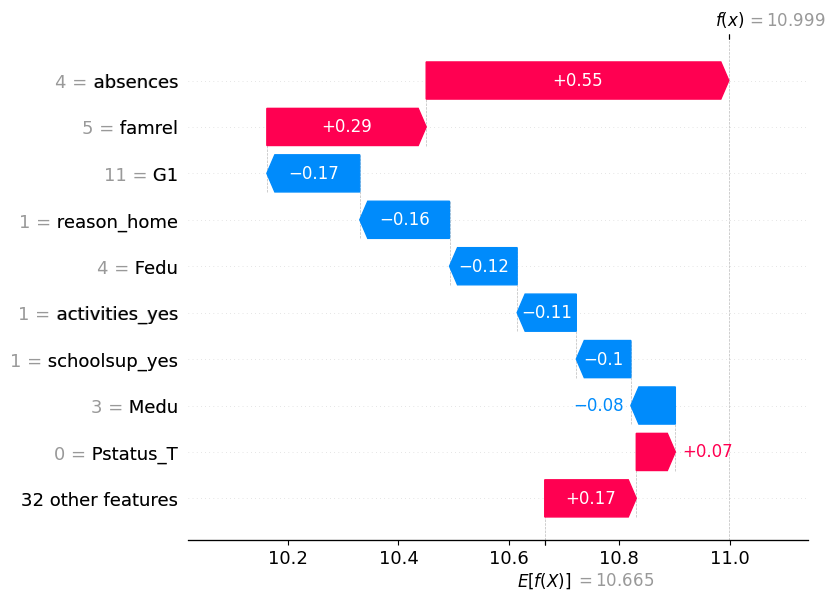

In [64]:
shap.plots.waterfall(shap_values[28]) # absences relevant

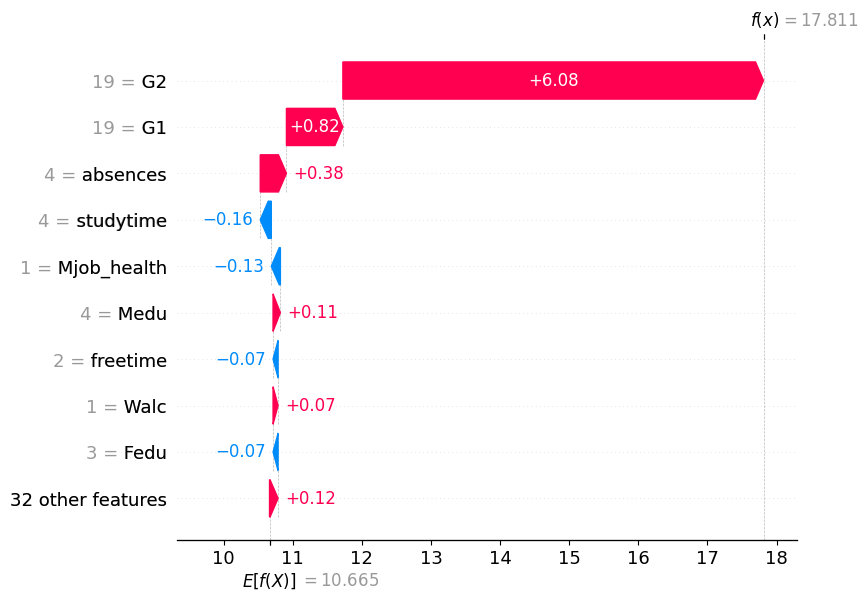

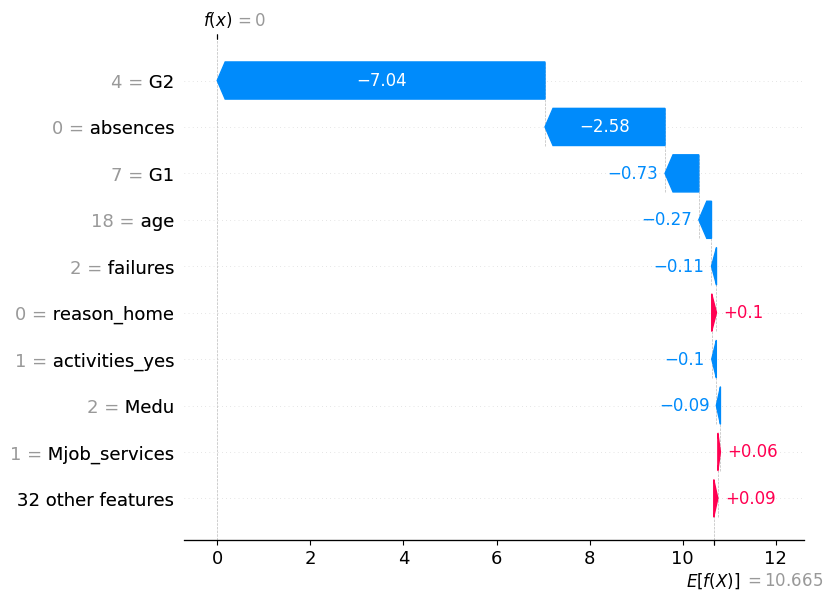

In [47]:
for i in SAMPLES_IDS:
    shap.plots.waterfall(shap_values[i])

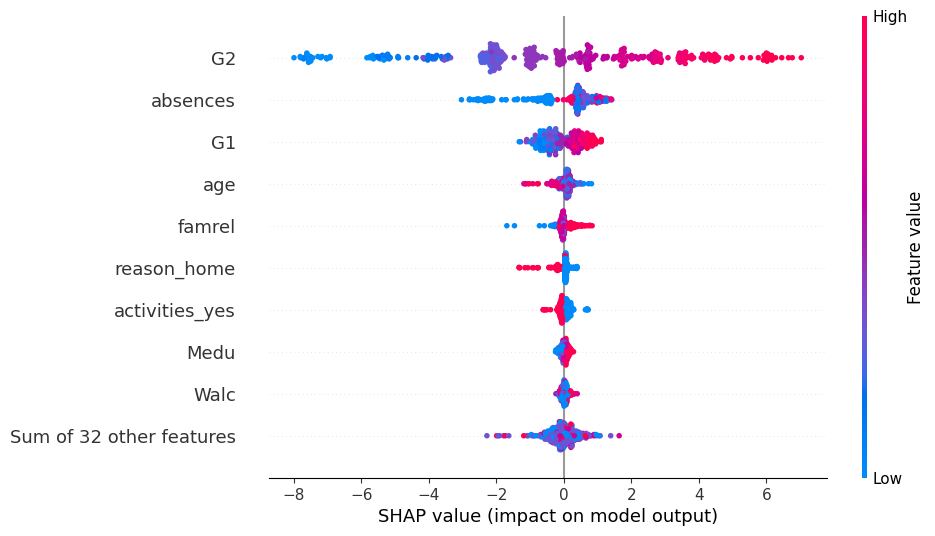

In [20]:
shap.plots.beeswarm(shap_values, max_display=10, plot_size=(9,6))

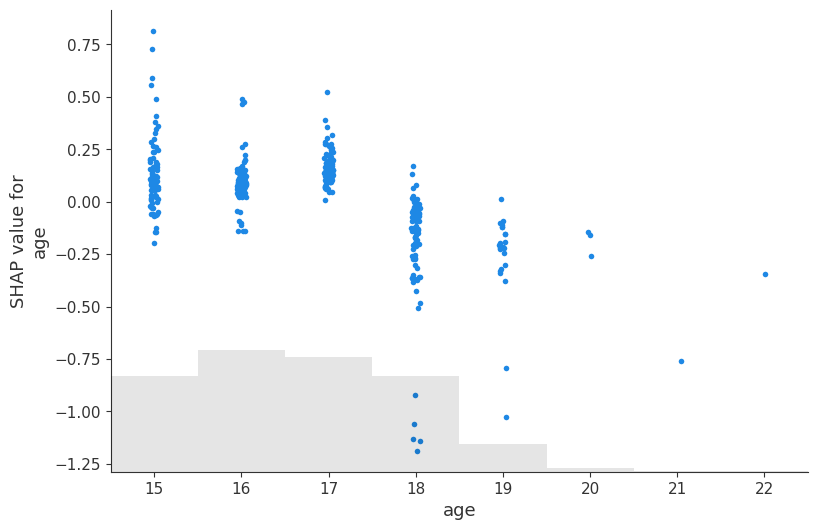

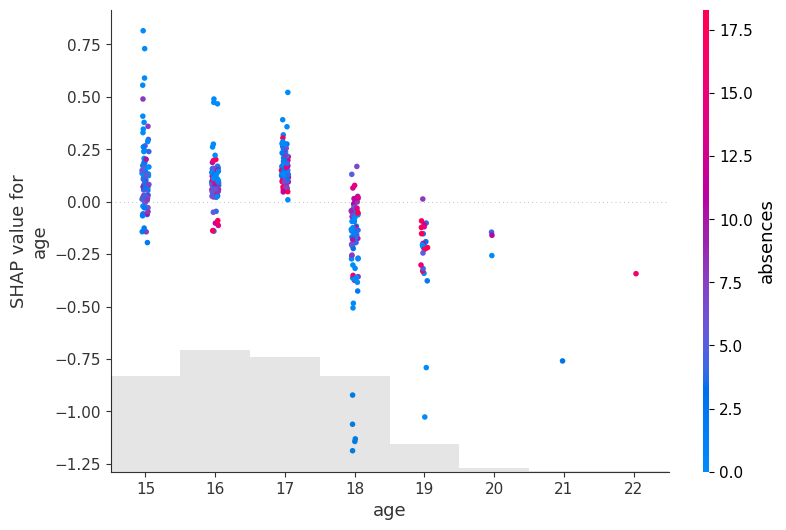

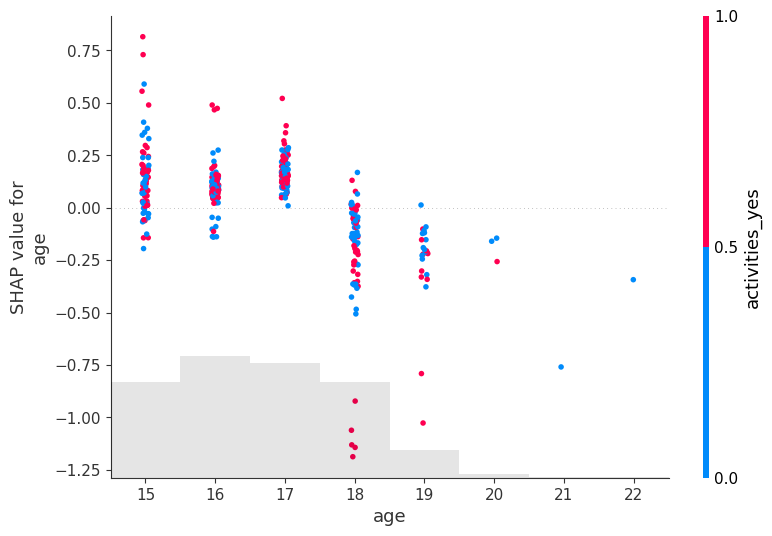

In [32]:
shap.plots.scatter(shap_values[:, "age"], show=False)
plt.gcf().set_size_inches(9,6)
plt.show()

shap.plots.scatter(shap_values[:, "age"], color=shap_values[:, "absences"],  show=False)
plt.gcf().set_size_inches(9,6)
plt.show()


shap.plots.scatter(shap_values[:, "age"], color=shap_values[:, "activities_yes"],  show=False)
plt.gcf().set_size_inches(9,6)
plt.show()

# Dalex


In [9]:
explainer = dx.Explainer(model, X, y, lambda m, d: m.predict(d))

Preparation of a new explainer is initiated

  -> data              : 395 rows 41 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 395 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function <lambda> at 0x7f9796eedbd0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.00121, mean = 10.5, max = 19.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -7.02, mean = -0.0416, max = 2.54
  -> model_info        : package xgboost

A new explainer has been created!


In [10]:
explainer.model_performance()

,mse,rmse,r2,mae,mad
XGBRegressor,0.485552,0.696815,0.976808,0.20071,0.000607


In [23]:
list(map(lambda x: int(x+0.5), explainer.predict(X.iloc[SAMPLES_IDS])))

[18, 0, 11]

In [25]:
observations = [X.iloc[[i]] for i in SAMPLES_IDS]

explanations = [explainer.predict_surrogate(obs) for obs in observations]

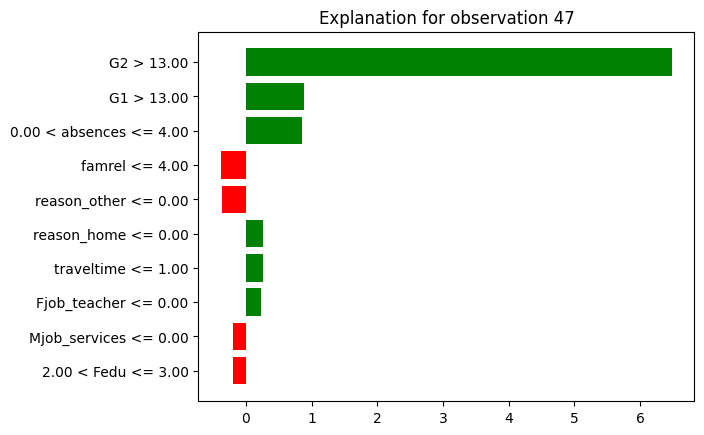

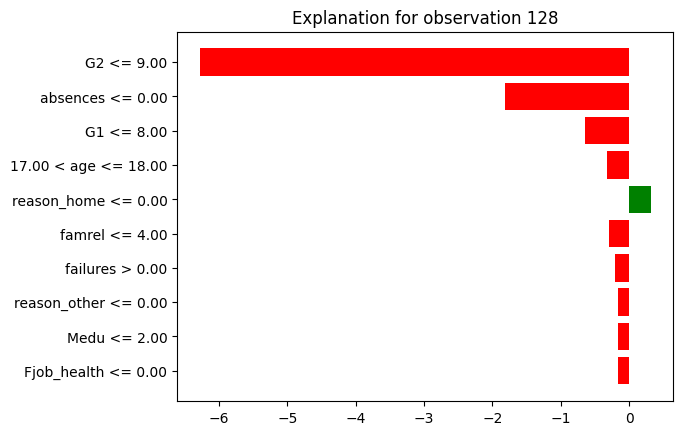

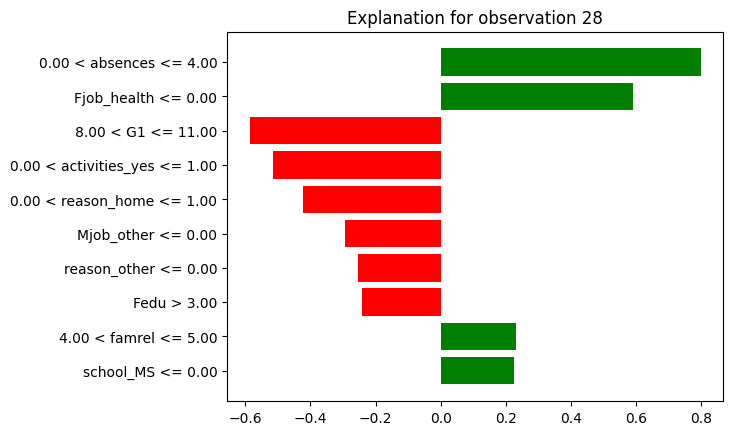

In [31]:
for idx, explanation in zip(SAMPLES_IDS, explanations):
    explanation.plot()
    plt.title(f'Explanation for observation {idx}') 


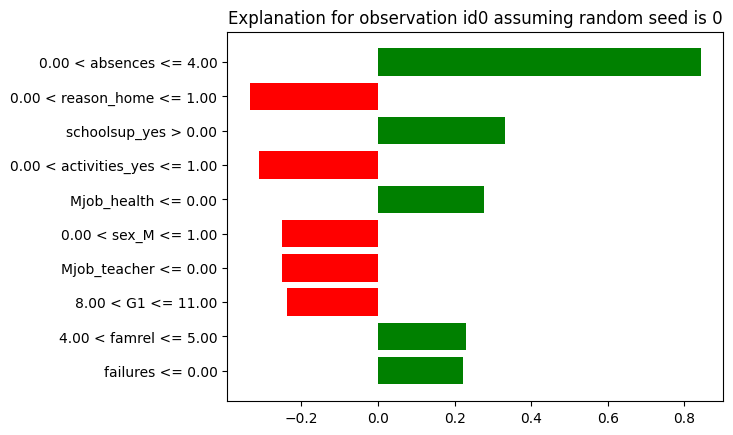

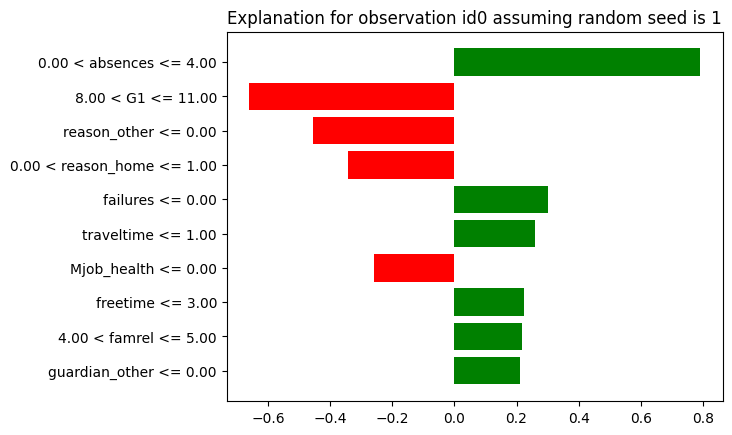

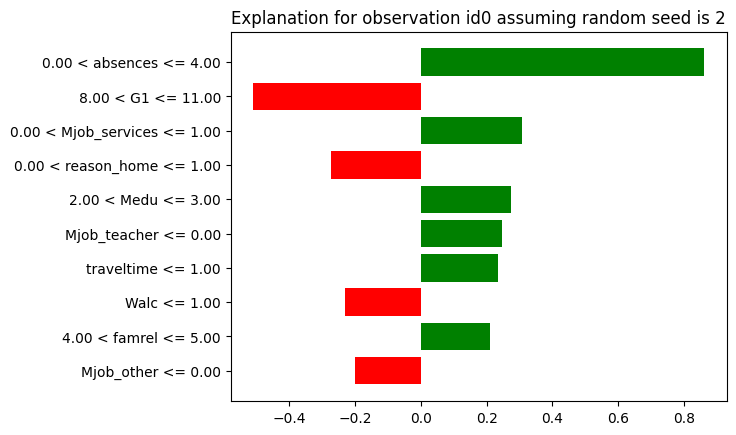

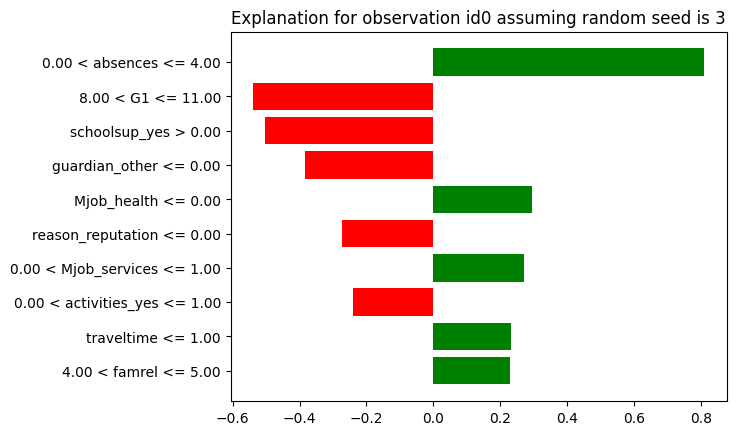

In [27]:
import random
import matplotlib.pyplot as plt

for seed in range(4):
    random.seed(seed)
    np.random.seed(seed)
    exp = explainer.predict_surrogate(observations[2])
    exp.plot(return_figure=True)
    plt.title(f'Explanation for observation id0 assuming random seed is {seed}')

In [34]:
data_dict = dict({})
for seed in range(100):
    random.seed(seed)
    np.random.seed(seed)
    exp = explainer.predict_surrogate(observations[2])
    for key, value in exp.as_list():
        if key not in data_dict.keys():
            data_dict[key] = []
        data_dict[key].append(value)

{'0.00 < absences <= 4.00': [0.8426843602328434,
  0.7910181644866672,
  0.8614125793228337,
  0.809758211695884,
  0.8469613520762631,
  0.7205724054562878,
  1.015723793585176,
  0.7447334035660035,
  0.9191800045900657,
  0.8629066200515548,
  1.0742195127177958,
  0.7401987533074622,
  0.8431433461960214,
  0.6456279893598391,
  0.8601582651986674,
  0.9631313157865069,
  0.8371568158251625,
  0.8110521021292578,
  0.8081202160188184,
  0.48465289652218296,
  0.693225402694626,
  0.8268274692689939,
  0.8355562759700107,
  0.767393076121054,
  0.8898882234919185,
  0.7373532884117135,
  0.9043642557070836,
  0.7386063687136447,
  0.6569591228990648,
  0.6942248726014718,
  1.07491285438482,
  0.7838054440527074,
  0.8536860471489168,
  0.6670317141533554,
  0.6017315969880348,
  0.6521077283535393,
  0.8681354349846442,
  0.7969169402406041,
  0.7744491932128943,
  0.7590367751134869,
  0.7779254814437402,
  0.774411812035784,
  0.5603659833777862,
  0.7416039925975988,
  0.7382346

In [57]:
bd_attribution = [explainer.predict_parts(X.iloc[[i]], type="break_down", label=f'sample {i}') for i in SAMPLES_IDS]

In [58]:
bd_attribution[0].plot(bd_attribution[1::])

# Different model


In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
name = type(model).__name__
print(f"Accuracy of {name} model:\nTrain set: {train_score}\nTest set: {test_score}")

Accuracy of LinearRegression model:
Train set: 0.8526127544892745
Test set: 0.8011458417873758


In [81]:
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

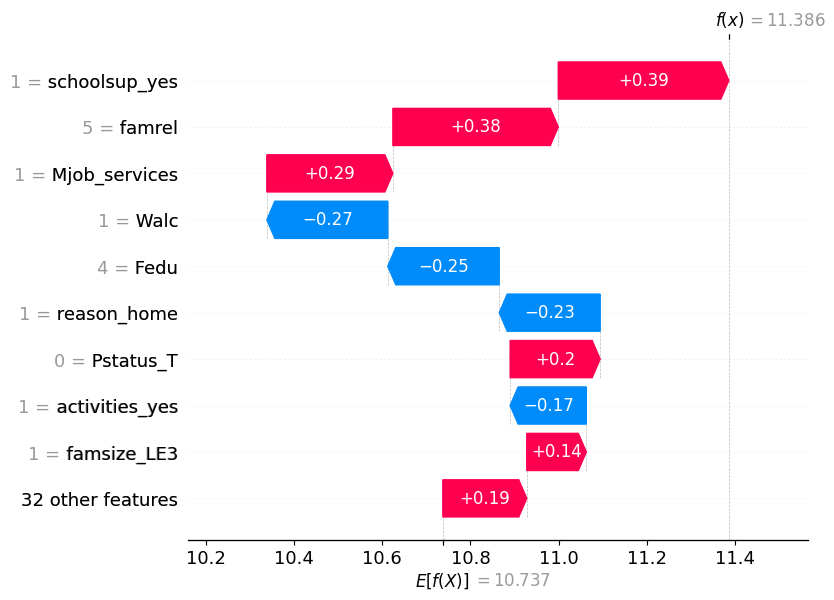

In [82]:
shap.plots.waterfall(shap_values[28])

# Results
We used `DecisionTreeClassifier`, `AdaBoostClassifier` and `LogisticRegression`.

Boosting algorithm had the worst performance with training accuracy of 26% and testing accuracy of 17%. 
Logistic regression model had 79% accuracy on training set and 22.7% on testing set.
DecisionTreeClassifier yielded the best results with 100% accuracy on training set and 26.5% accuracy on testing set.
